# Using Actual vs Ideal Weight to Predict Gender

Using a data set of actual vs ideal weight, we'll look to classify the gender of new individuals using a Naive Bayes classifier. The Naive Bayes classifier is a simple but robust classifier, especially with small datasets.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB

Step 1: Exploratory Data Analysis (EDA): Read in, clean, and visualize the data to get an idea of what we're looking at.

In [2]:
# https://github.com/Thinkful-Ed/curric-data-001-data-sets/blob/master/ideal-weight/ideal_weight.csv
df = pd.read_csv('ideal_weight.csv', usecols=[1,2,3,4])
df.head()

,'sex','actual','ideal','diff'
0,'Male',215,190,25
1,'Female',155,135,20
2,'Male',195,155,40
3,'Female',145,130,15
4,'Female',110,100,10


In [3]:
df = df.rename(columns=lambda x: x.replace('\'',''))
df['sex'] = df['sex'].str.replace('\'','')
df['sex'] = df['sex'].astype('category')
df.head()

,sex,actual,ideal,diff
0,Male,215,190,25
1,Female,155,135,20
2,Male,195,155,40
3,Female,145,130,15
4,Female,110,100,10


In [4]:
df.describe()

,actual,ideal,diff
count,182.000000,182.000000,182.000000
mean,147.774725,139.950549,7.824176
std,30.317269,29.750580,12.759651
min,90.000000,85.000000,-35.000000
25%,125.000000,120.000000,0.000000
50%,140.000000,130.000000,7.000000
75%,170.000000,164.500000,11.000000
max,235.000000,225.000000,55.000000


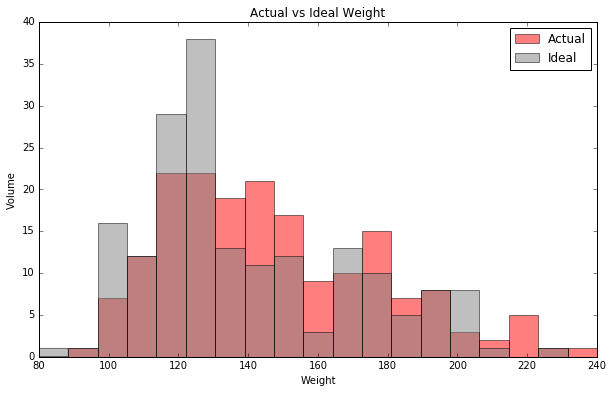

In [5]:
bins = np.linspace(80, 240, 20)

plt.figure(figsize=(10,6))
plt.hist(df['actual'], bins, alpha=0.5, color='r')
plt.hist(df['ideal'], bins, alpha=0.5, color='gray')
plt.legend(['Actual','Ideal'])
plt.xlabel('Weight')
plt.ylabel('Volume')
plt.title('Actual vs Ideal Weight');

At first glance it seems that this dataset skews toward overweight.

In [6]:
df['sex'].value_counts()

Female    119
Male       63
dtype: int64

There are almost twice as many females in this dataset, which may pose a problem in making valid predictions.

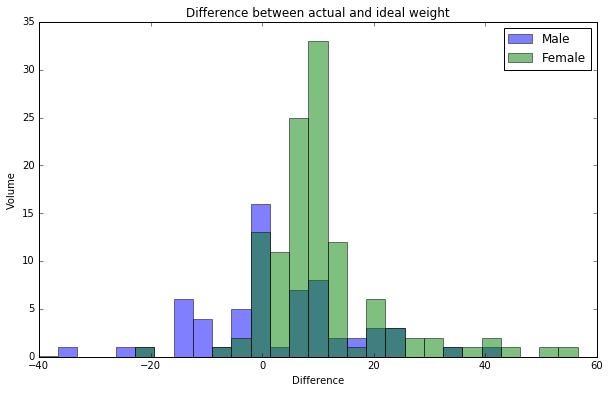

In [7]:
bins = np.linspace(-40, 60, 30)
plt.figure(figsize=(10,6))
plt.hist(df['diff'][df['sex']=='Male'], bins, alpha=0.5)
plt.hist(df['diff'][df['sex']=='Female'], bins, alpha=0.5)
plt.legend(['Male','Female'])
plt.title('Difference between actual and ideal weight')
plt.xlabel('Difference')
plt.ylabel('Volume');

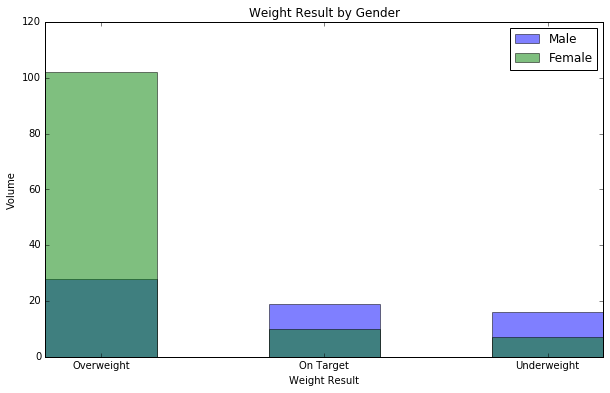

In [8]:
g = lambda x: 'over' if x > 0 else 'on' if x == 0 else 'under'
df['over_on_under'] = df['diff'].map(g)

loc = np.arange(3)
w = 0.5
plt.figure(figsize=(10,6))
plt.bar(loc, df['over_on_under'][df['sex']=='Male'].value_counts(), 
        width=w, alpha=0.5, color='b')
plt.bar(loc, df['over_on_under'][df['sex']=='Female'].value_counts(), 
        width=w, alpha=0.5, color='g')
plt.xticks(loc + w/2., ('Overweight','On Target','Underweight'))

plt.title('Weight Result by Gender')
plt.xlabel('Weight Result')
plt.ylabel('Volume')
plt.legend(('Male','Female'));

The distribution of men across the spectrum of underweight to overweight is fairly constant, while for the women this dataset is almost entirely overweight. This dataset is hardly representative of reality (cf https://www.niddk.nih.gov/health-information/health-statistics/Pages/overweight-obesity-statistics.aspx).  
  
New individuals introduced to a model based off of this dataset who are overweight will likely be classified as female.

Step 2: Define and fit the classifier, and measure its accuracy.

In [9]:
X = df[['actual','ideal','diff']]
y = df['sex']

gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X)
miss = (y != y_pred).sum()
print('Number of mislabeled points out of a total %d points : %d' % \
       (len(X), miss))
print('\nAccuracy = {}'.format((len(X)-miss)/len(X)))

Number of mislabeled points out of a total 182 points : 14

Accuracy = 0.9230769230769231


Step 3: Now introduce some new individuals. What does the classifier predict their gender to be?

In [10]:
print('An individual weighing 145 lbs who is 15 lbs underweight:')
print(gnb.predict([[145, 160, -15]]))

An individual weighing 145 lbs who is 15 lbs underweight:
['Male']


In [11]:
print('An individual weighing 160 lbs who is 15 lbs overweight:')
print(gnb.predict([[160, 145, 15]]))

An individual weighing 160 lbs who is 15 lbs overweight:
['Female']


In [12]:
print('An individual weighing 160 lbs who is 0 lbs overweight:')
print(gnb.predict([[160, 160, 0]]))

An individual weighing 160 lbs who is 0 lbs overweight:
['Male']


Conclusion: The model achieved a decent accuracy rate, and seems to be classifying new individuals as would be expected given the dataset. I would start over with a more representative dataset that also used a more equal number of each of the genders, and then use Naive Bayes again for the same task.